# Linear Regression

`In this exercise, we will extract the four fundamental notions for
supervised learning, through an example of linear regression on
two-dimensional data.`


In [1]:
# Import the necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


# 1. Dataset : (X, y) ;  m = 100,  n = 1

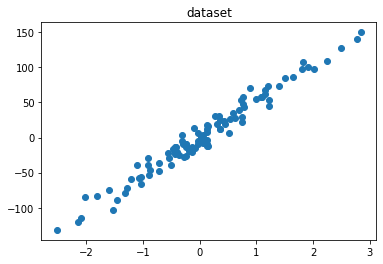

In [3]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)

# show the dataset
plt.title("dataset")
fig_1 = plt.scatter(x, y)

In [4]:
# Transform the dataset into matrices.
# That is used for writing the equations in the matrix form.
X = np.hstack((x, np.ones(x.shape)))
Y = y.reshape(y.shape[0], 1)

# 2. Model :

- Linear function : $$ f(x) = a x + b $$

- The role of the machine is to find the parameters $a$ and $b$

- In the matrix form:
$$F = X \theta ; \quad \text{with} \quad X = \left[\begin{array}{ccc}x^{1} & 1 \\ \vdots & \vdots\\ x^{m} & 1\end{array}\right] \quad \text{and} \quad \theta = \left[\begin{array}{ccc}a \\ b \end{array}\right]$$

In [5]:
def model(data_x, parameters):
    """ This function returns the linear model

    """
    return data_x @ parameters

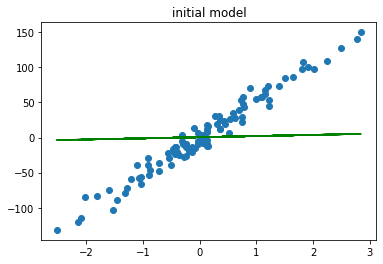

In [7]:
# initial parameters
init_theta = np.random.randn(2, 1)

# initial model
init_model = model(X, init_theta)

# plot initial model
plt.title("initial model")
plt.scatter(x, y)
fig_2 = plt.plot(x, init_model, c='g')

# 3. cost function :

- Residual sum of squares : $$ J(a, b) = \frac{1}{2m} \sum_{i = 1}^{m} \left(f(x^{(i)}) - y^{(i)}\right)^2 $$
- The object of this program is to minimize this function.
- In the matrix form: $$ J = \frac{1}{2m} \sum \left(X\theta - y\right)^2 $$

In [8]:
def cost_function(data_x, data_y, parameters):
    """ Returns the cost function for our model.

    """
    # Residual sum of squares
    rss = np.sum((data_x @ parameters - data_y) ** 2)

    # Number of rows times 2
    nb_rows_x2 = 2 * data_x.shape[0]

    return rss / nb_rows_x2

In [9]:
# show cost function for initial parameters
print(cost_function(X, Y, init_theta))

1482.7670588149806


# Minimization algorithm :

- gradient descent algorithm : $$ \theta = \theta - \alpha \; \nabla J(\theta) $$
- gradient : $$ \nabla J(\theta) = \nabla J(a, b) = \left[\begin{array}{ccc} \frac{\partial J(a, b)}{\partial a} \\ \frac{\partial J(a, b)}{\partial b} \end{array}\right] = \frac{}{} X^{T} \left(X \theta - y\right)$$

In [10]:
def gradient(data_x, data_y, parameters):
    """ Returns gradient of a function.

    """
    return data_x.T @ (data_x @ parameters - data_y) / data_x.shape[0]


def gradient_descent(data_x, data_y, parameters, learn_rate, nb_iterations):
    """ Finding a local minimum of a differentiable function by gradient
    descent algorithm.

    """

    # Cost history
    cost_tracking = np.zeros(nb_iterations)

    for _i in range(nb_iterations):
        parameters -= learn_rate * gradient(data_x, data_y, parameters)
        # recording the cost for each iteration
        cost_tracking[_i] = cost_function(data_x, data_y, parameters)

    return parameters, cost_tracking